# 01_echoJEC

El objetivo es agregar un eco a un fichero de audio. 

- 1. Leemos el WAV
- 2. Vectorizamos
- 3. Ploteamos la señal original vectorizada
- 4. Convolucion con Delta
- 5. Filtro de Eco
- 6. Convolucion con Eco
- 7. Ploteamos la señal con Eco


In [1]:
from __future__ import print_function, division
from builtins import range

import matplotlib.pyplot as plt
import numpy as np
import wave
import sys

from scipy.io.wavfile import write

### 1. Leemos el WAV

El fichero WAV a utilizar tiene: 

- un sampling rate = 16000 Hz
- por cada sample tiene = 16bits

El primer parametro es la frecuencia de muestreo (discretización en tiempo)
El segundo es la cuantización en amplitud (discretización en amplitud)

2^16 = 65536 es el número de diferentes niveles de sonido (amplitud)

También lo aplicaríamos a imagenes!
2^8 * 2^8 * 2^8 = 2^24 es cuantos colores podemos representar

In [2]:
spf = wave.open('helloworld.wav', 'r')

### 2. Vectorizamos

In [3]:
# Para ello primero extraemos el audio en raw del WAV usando readframes()
#-------------------------------------------------------------------------
# Wave_read.readframes(n): Reads and returns at most n frames of audio, as a string of bytes.
# tambien se puede consultar: http://www.cameronmacleod.com/blog/reading-wave-python
# leemos toda la señal
signal = spf.readframes(-1)


# Una vez que la señal nos ha quedado en un string, entonces lo pasamos a un vector numpy
#-----------------------------------------------------------------------------------------
# numpy.fromstring(string, dtype=float, count=-1, sep='')
# A new 1-D array initialized from raw binary or text data in a string.

signal = np.fromstring(signal, 'Int16')

# Imprimimos la dimension
print("Señal numpy:", signal.shape)

Señal numpy: (18432,)


/home/jorge/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  


### 3. Ploteamos la señal original vectorizada

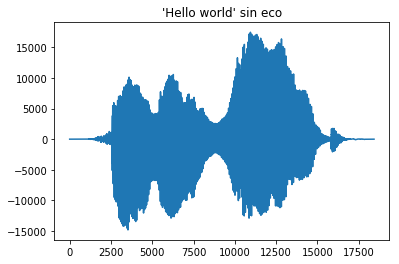

In [4]:
# Ploteamos la señal vectorizada
plt.plot(signal)
plt.title("'Hello world' sin eco")
plt.show()

### 4. Convolucion con Delta

In [5]:
# Ahora hacemos una convolución con la función DELTA o IMPULSO
# esta función debe producir la MISMA señal
delta = np.array([1., 0., 0., 0., 0.])
noecho = np.convolve(signal, delta)
print("Señal convolucionada con Delta:", noecho.shape)

# hacemos un assert para ver si son iguales 
assert(np.abs(noecho[:len(signal)] - signal).sum() < 0.000001)

Señal convolucionada con Delta: (18436,)


In [6]:
# Convertimos y salvamos a disco
noecho = noecho.astype(np.int16) # hay que asegurarse de convertirlo a int16, 
                                 # de lo contrario la amplitud será muy alta
    
# grabamos la señal convertida en nuevo archivo
write('noecho.wav', 16000, noecho)

Vemos que la señal es exactamente la misma despues de la convolución.

### 5. Filtro de Eco

In [7]:
# Creamos el filtro de eco

# creamos un vector de 16000 elementos (lo cual es 1 segundo) con sus componentes en cero
filt = np.zeros(16000)

# cada cuarto de segundo metemos un escalon decreciente (1 -> 0.6 -> 0.3 -> 0.2 -> 0.1)
#filt[0] = 1
#filt[4000] = 0.6
#filt[8000] = 0.3
#filt[12000] = 0.2
#filt[15999] = 0.1

filt[0] = 1
#filt[2000] = 0.9
filt[4000] = 0.8
#filt[6000] = 0.7
filt[8000] = 0.6
#filt[10000] = 0.5
filt[12000] = 0.4
#filt[14000] = 0.3
filt[15999] = 0.2



### 6. Convolucion con Eco

In [8]:
# hacemos la convolucion
out = np.convolve(signal, filt)
out = out.astype(np.int16) # lo mismo que antes, convertimos a int16

# guardamos la señal resultante de la convolución
write('out.wav', 16000, out)

### 7. Ploteamos la señal con Eco

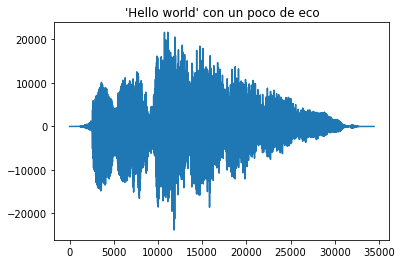

In [9]:
# Ploteamos la señal de salida
plt.plot(out)
plt.title("'Hello world' con un poco de eco")
plt.show()